In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import os

In [2]:
filepath=r"C:\Users\CSIO\Desktop\Diabetic Foot Research\Machine Learning Implementation\dataset_with_4_classes\combined_data\final.csv"
data=pd.read_csv(filepath)
data

,MTK1.T,MTK2.T,MTK3.T,MTK4.T,MTK5.T,D1.T,L.T,C.T,max_temp,min_temp,temp_range,condition
0,0.983221,1.579631,1.926185,2.091407,1.760453,0.619983,1.272439,0.915525,2.091407,0.619983,1.471423,0
1,0.125197,0.094649,0.608958,0.700101,1.500195,0.227996,1.762956,2.435764,2.435764,0.094649,2.341115,0
2,0.335517,0.938675,0.493425,0.343672,1.189942,1.257875,1.669362,1.263756,1.669362,0.335517,1.333844,0
3,0.343761,0.276866,0.537738,0.246287,1.398624,1.630739,0.438513,0.423720,1.630739,0.246287,1.384452,0
4,0.704690,1.595115,1.218438,0.859128,1.165247,0.722619,1.235193,3.400332,3.400332,0.704690,2.695642,1
...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.572060,0.651480,0.323167,2.548236,1.137525,3.652500,0.942357,0.385682,3.652500,0.323167,3.329333,1
74,1.643545,2.232720,2.246896,1.983081,1.971958,1.429466,1.704914,1.288972,2.246896,1.288972,0.957924,0
75,0.381049,1.013439,0.216111,0.816165,1.821659,1.642428,1.033259,0.374977,1.821659,0.216111,1.605548,0
76,0.609831,0.426914,1.071384,1.597074,2.917671,0.594115,3.530871,2.749073,3.530871,0.426914,3.103957,1


In [3]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=['condition'])
y=data['condition']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

# Multi-Layer Perceptron

In [63]:
!pip install tensorflow

   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------------------- 0.8/375.7 MB 5.6 MB/s eta 0:01:08
   ---------------------------------------- 1.6/375.7 MB 4.4 MB/s eta 0:01:25
   ---------------------------------------- 2.6/375.7 MB 4.7 MB/s eta 0:01:20
   ---------------------------------------- 3.9/375.7 MB 5.0 MB/s eta 0:01:15
    --------------------------------------- 5.0/375.7 MB 5.0 MB/s eta 0:01:14
    --------------------------------------- 5.8/375.7 MB 5.1 MB/s eta 0:01:13
    --------------------------------------- 6.6/375.7 MB 4.8 MB/s eta 0:01:18
    --------------------------------------- 6.8/375.7 MB 4.2 MB/s eta 0:01:28
    --------------------------------------- 7.3/375.7 MB 4.3 MB/s eta 0:01:27
    --------------------------------------- 7.9/375.7 MB 4.0 MB/s eta 0:01:33
    --------------------------------------- 8.4/375.7 MB 3.8 MB/s eta 0:01:37
    --------------------------------------- 8.9/375.7 MB 3.7 MB/s eta 0

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
!pip install keras-tuner


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

In [5]:
input_shape=[X_train.shape[1]]
input_shape

[11]

In [6]:
import warnings 
warnings.filterwarnings("ignore")
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=1,input_shape=input_shape),
    tf.keras.layers.Dense(units=64,activation='tanh'),
    tf.keras.layers.Dense(units=32,activation='tanh'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,253 (8.80 KB)

 Trainable params: 2,253 (8.80 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
import warnings
warnings.filterwarnings("ignore")
model.compile(optimizer='sgd',loss='mae')
model.fit(X_train,y_train, validation_data=(X_test,y_test), batch_size=30, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - loss: 0.5000 - val_loss: 0.4971
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.4994 - val_loss: 0.4966
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.4987 - val_loss: 0.4962
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.4982 - val_loss: 0.4958
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4977 - val_loss: 0.4952
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4971 - val_loss: 0.4948
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.4965 - val_loss: 0.4943
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.4961 - val_loss: 0.4938
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.4955 - val_loss: 0.4932
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.4947 - val_loss: 0.4928
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.4946 - val_loss: 0.4924
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.4945 - val_l

In [8]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_train)
y_pred_labels = (y_pred > 0.5).astype(int)
accuracy=accuracy_score(y_pred_labels,y_train)
print(f"Training Accuracy:{accuracy*100:.3f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Training Accuracy:66.667%


In [9]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(
        units=hp.Int('units1', min_value=32, max_value=128, step=16),
        activation=hp.Choice('act1', ['relu', 'tanh']),
        input_shape=input_shape))
    model.add(keras.layers.Dense(
        units=hp.Int('units2', min_value=16, max_value=64, step=16),
        activation=hp.Choice('act2', ['relu', 'tanh'])))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'sgd']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [10]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='tune_mlp'
)

# Perform the search
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Trial 10 Complete [00h 00m 25s]
val_accuracy: 0.9615384638309479

Best val_accuracy So Far: 0.9743589758872986
Total elapsed time: 00h 04m 03s


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,697 (22.25 KB)

 Trainable params: 5,697 (22.25 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from sklearn.metrics import accuracy_score
y_pred=best_model.predict(X_train)
y_pred_labels = (y_pred > 0.5).astype(int)
accuracy=accuracy_score(y_pred_labels,y_train)
print(f"Training Accuracy:{accuracy*100:.3f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Training Accuracy:89.744%


In [12]:
y_pred=best_model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)
accuracy=accuracy_score(y_pred_labels,y_test)
print(f"Testing Accuracy:{accuracy*100:.3f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Testing Accuracy:97.436%


In [13]:
import warnings
warnings.filterwarnings("ignore")
values=[[3.1,3,3,3,3,3,3,3,3.1,3,0.1]]
values=np.array(values)
cond=best_model.predict(values)
cond1=(cond>0.5).astype(int)
print(cond1[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


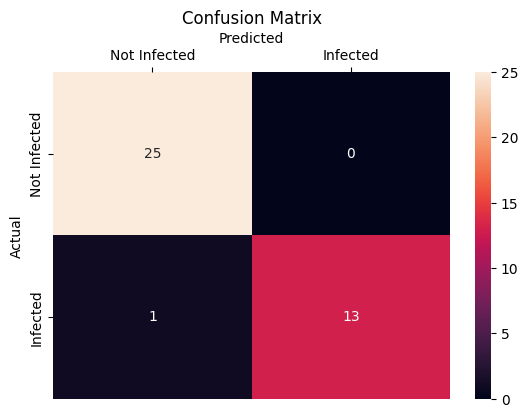

Accuracy: 97.436%
Precision: 100.000%
Sensitivity (Recall): 96.154%
F1-Score: 98.039%


In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

actual=y_test
X_test=np.array(X_test)
predicted=best_model.predict(X_test)
predicted1=(predicted>0.5).astype(int)
cm=confusion_matrix(actual,predicted1)

sns.heatmap(cm,annot=True,fmt='g',
           xticklabels=['Not Infected','Infected'],
           yticklabels=['Not Infected','Infected'])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()


TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy*100:.3f}%")
print(f"Precision: {precision*100:.3f}%")
print(f"Sensitivity (Recall): {recall*100:.3f}%")
print(f"F1-Score: {f1_score*100:.3f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


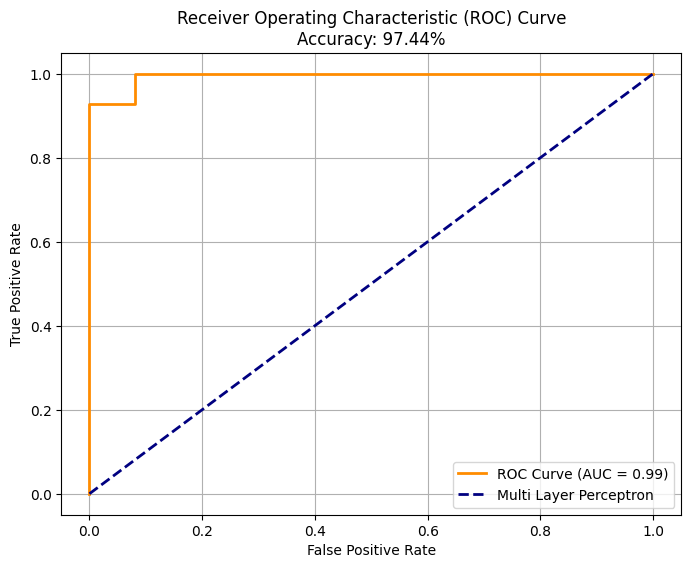

In [15]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Predict probabilities (for positive class)
y_prob = best_model.predict(X_test).flatten()  # For binary classification (output between 0 and 1)

# Binarize predictions using threshold
y_pred = (y_prob > 0.5).astype(int)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Multi Layer Perceptron')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(accuracy * 100))
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [16]:
import warnings
warnings.filterwarnings("ignore")
values=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.8,0.1,0.7]]
values=np.array(values)
cond=best_model.predict(values)
cond1=(cond>0.5).astype(int)
print(cond1[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
0


In [17]:
values=[[3.1,3,3,3,3,3,3,3,3.1,3,0.1]]
values=np.array(values)
cond=best_model.predict(values)
cond1=(cond>0.5).astype(int)
print(cond1[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1


In [18]:
#Failed here
values=[[2.0,2.0,2.3,2.4,2.5,2.6,0.7,0.8,2.6,0.7,1.9]]
values=np.array(values)
cond=best_model.predict(values)
cond1=(cond>0.5).astype(int)
print(cond1[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
0


In [19]:
values=[[6.1,2.2,0.3,0.4,0.5,0.6,9.7,0.8,6.1,0.3,5.8]]
values=np.array(values)
cond=best_model.predict(values)
cond1=(cond>0.5).astype(int)
print(cond1[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1


In [30]:
#failed here
values=[[3.5,0.2,2.3,2.4,2.5,1.6,2.7,0.8,3.5,0.2,3.3]]
values=np.array(values)
cond=best_model.predict(values)
cond1=(cond>0.5).astype(int)
print(cond1[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
0


In [31]:
values=[[3.1,2.2,0.3,0.4,0.5,0.6,0.7,0.8,3.1,0.3,2.8]]
values=np.array(values)
cond=best_model.predict(values)
cond1=(cond>0.5).astype(int)
print(cond1[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1


In [32]:
values=[[3.1,3,3,3,3,3,3,3,3.1,3,0.1]]
values=np.array(values)
cond=best_model.predict(values)
cond1=(cond>0.5).astype(int)
print(cond1[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1


In [33]:
values=[[3,3,3,3,3,3,3,3,3,3,0]]
values=np.array(values)
cond=best_model.predict(values)
cond1=(cond>0.5).astype(int)
print(cond1[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1


In [34]:
values=[[0,0.1,0,0.3,0.4,0,0,0,0.4,0.1,0.3]]
values=np.array(values)
cond=best_model.predict(values)
cond1=(cond>0.5).astype(int)
print(cond1[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
0


In [35]:
values=[[0,0,0,0,0,0,0,0,0,0,0]]
values=np.array(values)
cond=best_model.predict(values)
cond1=(cond>0.5).astype(int)
print(cond1[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
0


In [36]:
values=[[0.704690, 1.595115	,1.218438, 0.859128, 1.165247, 0.722619 , 1.235193 ,3.400332,3.400332, 0.704690 , 2.695642]]
values=np.array(values)
cond=best_model.predict(values)
cond1=(cond>0.5).astype(int)
print(cond1[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1


In [37]:
values=[[0.855601,	1.885228,	0.312482,	0.416831,	1.506368,	0.580588,	1.454307,	3.5,	3.5,	0.312482, 3.187518]]
values=np.array(values)
cond=best_model.predict(values)
cond1=(cond>0.5).astype(int)
print(cond1[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1


In [38]:
values=[[4.149849,	5.530390,	4.016367,	3.915858,	2.414940,	3.060105,	0.416193,	4.773635,	5.530390,	0.416193,	5.114198	]]
values=np.array(values)
cond=best_model.predict(values)
cond1=(cond>0.5).astype(int)
print(cond1[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1


In [39]:
values=[[0.414943,	1.192581,	1.365798,	0.995435,	2.109256,	0.506431,	2.456453,	2.918048,	2.918048,	0.414943,	2.503104	]]
values=np.array(values)
cond=best_model.predict(values)
cond1=(cond>0.5).astype(int)
print(cond1[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1
